In [3]:
#Librerias
import numpy as np
import pandas as pd
import fitz
from docx import Document
import re
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')
from nltk.stem.snowball import SnowballStemmer
spanishStemmer = SnowballStemmer('spanish')
from nltk.stem.porter import PorterStemmer
import string
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial.distance import cosine

from wordcloud import WordCloud, ImageColorGenerator
import PIL.Image
from IPython.display import display

In [4]:
docSamper = fitz.open("D:/KL/NLP/Proyecto/pdfPlanes/9. (1994-1998) - Ernesto Samper.pdf")
docPastrana = fitz.open("D:/KL/NLP/Proyecto/pdfPlanes/10. (1998-2002) - Andrés Pastrana.pdf")
docUribe = fitz.open("D:/KL/NLP/Proyecto/pdfPlanes/11. (2002-2010) - Álvaro Uribe Vélez.pdf")
docSantos1 = fitz.open("D:/KL/NLP/Proyecto/pdfPlanes/12. (2010-2014) - Juan Manuel Santos.pdf")
docSantos2 = fitz.open("D:/KL/NLP/Proyecto/pdfPlanes/13. (2014-2018) - Juan Manuel Santos.pdf")
docDuque = fitz.open("D:/KL/NLP/Proyecto/pdfPlanes/14. (2018-2022) - Iván Duque.pdf")

In [5]:
print('*'*50)
print('(1994-1998) - Ernesto Samper')
print("Numero de páginas: ",docSamper.pageCount)
print("Formato: ",docSamper.metadata['format'])
print('*'*50)
print('(1998-2002) - Andrés Pastrana')
print("Numero de páginas: ",docPastrana.pageCount)
print("Formato: ",docPastrana.metadata['format'])
print('*'*50)
print('(2002-2010) - Álvaro Uribe Vélez')
print("Numero de páginas: ",docUribe.pageCount)
print("Formato: ",docUribe.metadata['format'])
print('*'*50)
print('(2010-2014) - Juan Manuel Santos')
print("Numero de páginas: ",docSantos1.pageCount)
print("Formato: ",docSantos1.metadata['format'])
print('*'*50)
print('(2014-2018) - Juan Manuel Santos')
print("Numero de páginas: ",docSantos2.pageCount)
print("Formato: ",docSantos2.metadata['format'])
print('*'*50)
print('(2018-2022) - Iván Duque')
print("Numero de páginas: ",docDuque.pageCount)
print("Formato: ",docDuque.metadata['format'])

**************************************************
(1994-1998) - Ernesto Samper
Numero de páginas:  277
Formato:  PDF 1.4
**************************************************
(1998-2002) - Andrés Pastrana
Numero de páginas:  774
Formato:  PDF 1.4
**************************************************
(2002-2010) - Álvaro Uribe Vélez
Numero de páginas:  354
Formato:  PDF 1.4
**************************************************
(2010-2014) - Juan Manuel Santos
Numero de páginas:  1042
Formato:  PDF 1.6
**************************************************
(2014-2018) - Juan Manuel Santos
Numero de páginas:  1230
Formato:  PDF 1.6
**************************************************
(2018-2022) - Iván Duque
Numero de páginas:  1457
Formato:  PDF 1.7


## Definir funciones

In [6]:
def docx_to_dict(name_of_file):
    docx_dict = {}
    document = Document(name_of_file)
    indx = 0
    for para in document.paragraphs:
        indx += 1
        if (len(para.text)>0):
            docx_dict[indx] = para.text
    return docx_dict

In [7]:
def pre_procesado(texto):
    texto = re.sub(r"[\W\d_]+", " ", texto.lower())
    texto = [palabra for palabra in texto.split() if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

In [8]:
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

In [9]:
def limpiar_tokenizar(texto):
    nuevo_texto = texto.lower()
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    nuevo_texto = nuevo_texto.split(sep = ' ')
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    return(nuevo_texto)

In [10]:
def similitud_coseno(a,b):
    distancia = cosine(a,b)
    return 1-distancia

## Importar datos

In [11]:
doc = docx_to_dict('D:/KL/NLP/Proyecto/pdfPlanes/9. (1994-1998) - Ernesto Samper.docx')
dfSamper = pd.DataFrame([[key, doc[key]] for key in doc.keys()], columns=['Parrafo', 'Texto'])
dfSamper.insert(0, "Periodo", '1994 - 1998', allow_duplicates=False)
dfSamper.insert(0, "Presidente", 'Samper', allow_duplicates=False)
dfSamper.head()

,Presidente,Periodo,Parrafo,Texto
0,Samper,1994 - 1998,11,EI SaIto SociaI
1,Samper,1994 - 1998,14,P l a n N a c i o n a l d e D e s a r r o l l o
2,Samper,1994 - 1998,15,Ley de inversiones 1994 - 1998
3,Samper,1994 - 1998,22,PRESIDENCIA DE LA REPÚBLICA DEPARTAMENTO NACIO...
4,Samper,1994 - 1998,27,Presidente de la República. Ernesto Samper Pizano


In [12]:
doc = docx_to_dict('D:/KL/NLP/Proyecto/pdfPlanes/10. (1998-2002) - Andrés Pastrana.docx')
dfPastrana = pd.DataFrame([[key, doc[key]] for key in doc.keys()], columns=['Parrafo', 'Texto'])
dfPastrana.insert(0, "Periodo", '1998 - 2002', allow_duplicates=False)
dfPastrana.insert(0, "Presidente", 'Pastrana', allow_duplicates=False)
dfPastrana.head()

,Presidente,Periodo,Parrafo,Texto
0,Pastrana,1998 - 2002,6,PLAN NACIONAL DE DESARROLLO
1,Pastrana,1998 - 2002,7,1998-2002
2,Pastrana,1998 - 2002,8,CAMBIO PARA CONSTRUIR LA PAZ
3,Pastrana,1998 - 2002,17,TOMO 1
4,Pastrana,1998 - 2002,24,REPÚBLICA DE COLOMBIA DEPARTAMENTO NACIONAL DE...


In [13]:
doc = docx_to_dict('D:/KL/NLP/Proyecto/pdfPlanes/11. (2002-2010) - Álvaro Uribe Vélez.docx')
dfUribe = pd.DataFrame([[key, doc[key]] for key in doc.keys()], columns=['Parrafo', 'Texto'])
dfUribe.insert(0, "Periodo", '2002 - 2010', allow_duplicates=False)
dfUribe.insert(0, "Presidente", 'Uribe', allow_duplicates=False)
dfUribe.head()

,Presidente,Periodo,Parrafo,Texto
0,Uribe,2002 - 2010,9,P an Naciona de Desarro o 2002-2006
1,Uribe,2002 - 2010,22,Hacia un Estado Comunitario
2,Uribe,2002 - 2010,43,© DepaJtamento Nacional de Planeación ISBN 802...
3,Uribe,2002 - 2010,45,CooJdinación EditoJial
4,Uribe,2002 - 2010,46,Gr¥po de Com¥ scacso es y 9e/acso es Púb/scas


In [14]:
doc = docx_to_dict('D:/KL/NLP/Proyecto/pdfPlanes/12. (2010-2014) - Juan Manuel Santos.docx')
dfSantos = pd.DataFrame([[key, doc[key]] for key in doc.keys()], columns=['Parrafo', 'Texto'])
dfSantos.insert(0, "Periodo", '2010 - 2014', allow_duplicates=False)
dfSantos.insert(0, "Presidente", 'Santos', allow_duplicates=False)
dfSantos.head()

,Presidente,Periodo,Parrafo,Texto
0,Santos,2010 - 2014,3,Plan Nacional de
1,Santos,2010 - 2014,4,Desarrollo
2,Santos,2010 - 2014,6,2010 - 2014
3,Santos,2010 - 2014,8,"Más empleo, menos pobreza y más seguridad"
4,Santos,2010 - 2014,11,Subdirección General


In [15]:
doc = docx_to_dict('D:/KL/NLP/Proyecto/pdfPlanes/13. (2014-2018) - Juan Manuel Santos.docx')
dfSantos2 = pd.DataFrame([[key, doc[key]] for key in doc.keys()], columns=['Parrafo', 'Texto'])
dfSantos2.insert(0, "Periodo", '2014 - 2018', allow_duplicates=False)
dfSantos2.insert(0, "Presidente", 'Santos', allow_duplicates=False)
dfSantos2.head()

,Presidente,Periodo,Parrafo,Texto
0,Santos,2014 - 2018,1,\n
1,Santos,2014 - 2018,4,Plan nacional de desarrollo
2,Santos,2014 - 2018,6,2014-2018
3,Santos,2014 - 2018,8,Tomo 1
4,Santos,2014 - 2018,9,Presidente de la República


In [16]:
doc = docx_to_dict('D:/KL/NLP/Proyecto/pdfPlanes/14. (2018-2022) - Iván Duque.docx')
dfDuque = pd.DataFrame([[key, doc[key]] for key in doc.keys()], columns=['Parrafo', 'Texto'])
dfDuque.insert(0, "Periodo", '2018 - 2022', allow_duplicates=False)
dfDuque.insert(0, "Presidente", 'Duque', allow_duplicates=False)
dfDuque.head()

,Presidente,Periodo,Parrafo,Texto
0,Duque,2018 - 2022,4,
1,Duque,2018 - 2022,5,
2,Duque,2018 - 2022,6,Presidente de la República Iván Duque Márquez
3,Duque,2018 - 2022,7,
4,Duque,2018 - 2022,8,Vicepresidente de la República Marta Lucía Ram...


## Consolidado de Planes Nacionales de Desarrollo

In [17]:
pnd = pd.concat([dfSamper, dfPastrana, dfUribe, dfSantos, dfSantos2, dfDuque], ignore_index=True)
pnd['pre-procesado'] = pnd['Texto'].apply(lambda texto: pre_procesado(texto))
pnd['stemmedtext'] = get_stemmed_text(pnd['pre-procesado'])
pnd["textCount"] = pnd["Texto"].str.len()
pnd = pnd.drop(pnd[pnd['textCount']<2].index)
pnd

,Presidente,Periodo,Parrafo,Texto,pre-procesado,stemmedtext,textCount
0,Samper,1994 - 1998,11,EI SaIto SociaI,ei saito sociai,ei saito sociai,15
1,Samper,1994 - 1998,14,P l a n N a c i o n a l d e D e s a r r o l l o,p l n n c i n l d d s r r l l,p l n n c i n l d d s r r l l,47
2,Samper,1994 - 1998,15,Ley de inversiones 1994 - 1998,ley inversiones,ley inversion,30
3,Samper,1994 - 1998,22,PRESIDENCIA DE LA REPÚBLICA DEPARTAMENTO NACIO...,presidencia república departamento nacional pl...,presidencia república departamento nacion plan...,63
4,Samper,1994 - 1998,27,Presidente de la República. Ernesto Samper Pizano,presidente república ernesto samper pizano,president república ernesto samper pizano,49
...,...,...,...,...,...,...,...
35430,Duque,2018 - 2022,10482,El PND 2018- 2022 implica ponerse de acuerdo e...,pnd implica ponerse acuerdo gran pacto concurr...,pnd implica poners acuerdo gran pacto concurre...,528
35431,Duque,2018 - 2022,10483,"Esto conlleva, por ejemplo, espacios de coordi...",conlleva ejemplo espacios coordinación efectiv...,conlleva ejemplo espacio coordinación efectiva...,842
35432,Duque,2018 - 2022,10484,"En el plano internacional, el Pacto por la Leg...",plano internacional pacto legalidad pacto i pl...,plano internacion pacto legalidad pacto i plan...,527
35433,Duque,2018 - 2022,10485,El Plan Nacional de Desarrollo permitirá adela...,plan nacional desarrollo permitirá adelantar a...,plan nacion desarrollo permitirá adelantar acc...,153


In [18]:
pnd['texto_tokenizado'] = pnd['pre-procesado'].apply(lambda x: limpiar_tokenizar(x))
pnd[['pre-procesado', 'texto_tokenizado']].head()

,pre-procesado,texto_tokenizado
0,ei saito sociai,"[ei, saito, sociai]"
1,p l n n c i n l d d s r r l l,[]
2,ley inversiones,"[ley, inversiones]"
3,presidencia república departamento nacional pl...,"[presidencia, república, departamento, naciona..."
4,presidente república ernesto samper pizano,"[presidente, república, ernesto, samper, pizano]"


In [19]:
pnd_tidy = pnd.explode(column='texto_tokenizado')
pnd_tidy = pnd_tidy.drop(columns='Texto')
pnd_tidy = pnd_tidy.drop(columns='pre-procesado')
pnd_tidy = pnd_tidy.drop(columns='textCount')
pnd_tidy = pnd_tidy.rename(columns={'texto_tokenizado':'token'})
pnd_tidy.head(3)

,Presidente,Periodo,Parrafo,stemmedtext,token
0,Samper,1994 - 1998,11,ei saito sociai,ei
0,Samper,1994 - 1998,11,ei saito sociai,saito
0,Samper,1994 - 1998,11,ei saito sociai,sociai


In [20]:
print('Número de parrafos PND Samper:               ' + str(dfSamper.shape[0]))
print('Número de parrafos PND Pastrana:             ' + str(dfPastrana.shape[0]))
print('Número de parrafos PND Uribe:                ' + str(dfUribe.shape[0]))
print('Número de parrafos PND Santos 1er periodo:   ' + str(dfSantos.shape[0]))
print('Número de parrafos PND Santos 2do periodo:   ' + str(dfSantos2.shape[0]))
print('Número de parrafos PND Duque:                ' + str(dfDuque.shape[0]))

Número de parrafos PND Samper:               2208
Número de parrafos PND Pastrana:             6115
Número de parrafos PND Uribe:                3390
Número de parrafos PND Santos 1er periodo:   6358
Número de parrafos PND Santos 2do periodo:   7397
Número de parrafos PND Duque:                9973


In [21]:
print('-'*50)
print('Palabras totales por presidente')
print('-'*50)
pnd_tidy.groupby(by ='Presidente')['token'].count()

--------------------------------------------------
Palabras totales por presidente
--------------------------------------------------


Presidente
Duque       211988
Pastrana    131813
Samper       63492
Santos      350379
Uribe        69615
Name: token, dtype: int64

In [22]:
print('-'*50)
print('Palabras distintas por autor')
print('-'*50)
pnd_tidy.groupby(by='Presidente')['token'].nunique()

--------------------------------------------------
Palabras distintas por autor
--------------------------------------------------


Presidente
Duque       15656
Pastrana    13266
Samper       9641
Santos      18345
Uribe       11283
Name: token, dtype: int64

In [23]:
# Longitud media y desviación de los tweets de cada autor
# ==============================================================================
temp_df = pd.DataFrame(pnd_tidy.groupby(by = ["Presidente", "Parrafo"])["token"].count())
temp_df.reset_index().groupby("Presidente")["token"].agg(['mean', 'std'])

,mean,std
Presidente,,
Duque,22.109720,21.132089
Pastrana,21.640617,20.504781
Samper,28.755435,27.791491
Santos,45.204361,35.060155
Uribe,20.590062,20.158953


In [24]:
# 10 palabras más utilizadas por cada autor

pnd_tidy.groupby(['Presidente','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('Presidente') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(10))

Presidente        token  count
Presidente                                     
Duque      9915       Duque     nacional   1976
           4428       Duque   desarrollo   1739
           5041       Duque          dnp   1141
           10679      Duque        pacto    896
           11359      Duque     política    894
           2773       Duque     colombia    878
           8107       Duque  información    824
           13868      Duque       social    775
           1475       Duque          así    767
           5739       Duque    entidades    758
Pastrana   19502   Pastrana   desarrollo   1206
           24184   Pastrana     nacional   1077
           27163   Pastrana       sector    756
           26364   Pastrana     recursos    748
           27484   Pastrana       social    643
           25305   Pastrana     política    633
           27430   Pastrana      sistema    617
           21899   Pastrana     gobierno    568
           20256   Pastrana    educación    528
           27274   Pastrana    servicios    501
Samper     33698     Samper           ia   1427
           32285     Samper           ei   1152
           34373     Samper          ios    756
           31602     Samper          dei    634
           33712     Samper          ias    552
           31730     Samper   desarrollo    452
           37273     Samper       sector    360
           35150     Samper     nacional    345
           36697     Samper     recursos    329
           37490     Samper       social    322
Santos     50335     Santos     nacional   3609
           43916     Santos   desarrollo   3260
           54745     Santos      sistema   1599
           47158     Santos     gobierno   1554
           53232     Santos     recursos   1553
           40270     Santos          así   1408
           54497     Santos    servicios   1364
           45399     Santos    entidades   1341
           51318     Santos         país   1337
           54351     Santos       sector   1309
Uribe      66236      Uribe          qπe   1191
           65062      Uribe         paja   1078
           64543      Uribe     nacional    681
           65831      Uribe          poj    541
           68144      Uribe           πn    532
           68145      Uribe          πna    432
           60191      Uribe   desajjollo    369
           67011      Uribe       social    346
           62246      Uribe     gobiejno    306
           67194      Uribe           sπ    303

In [25]:
# Obtención de listado de stopwords para eliminar palabras no relevantes para el estudio

stopwords_sp = list(stopwords.words('spanish'))
stopwords_sp.extend(('nacional', 'desarrollo', 'colombia', 'plan', 'dnp'
                     ,'república','departamento','planeación', 'presidente'
                     ,'ernesto', 'samper', 'pizano', 'andres', 'pastrana'
                     ,'arango', 'alvaro', 'uribe', 'velez', 'juan', 'manuel'
                     ,'santos', 'ivan', 'duque'
                     ,'asi','desajjollo','gobiejno', 'gobierno','politica'
                     ,'así','país','ia','ei','ios','dei','ias','ai','través'
                     ,'qπe','paja','poj','πn','πna','sπ','sπs','entje'))

# Filtrado para excluir stopwords
pnd_tidy = pnd_tidy[~(pnd_tidy["token"].isin(stopwords_sp))]

In [26]:
# 10 palabras más utilizadas por cada autor
# volvemos a mirar las 10 palabras mas utilizadas despues de eliminar palabras no relevantes
pnd_tidy.groupby(['Presidente','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('Presidente') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(10))

Presidente          token  count
Presidente                                       
Duque      10666      Duque          pacto    896
           11342      Duque       política    894
           8097       Duque    información    824
           13849      Duque         social    775
           5731       Duque      entidades    758
           13466      Duque         sector    754
           13576      Duque      servicios    724
           13762      Duque        sistema    692
           7183       Duque        gestión    681
           6083       Duque    estrategias    674
Pastrana   27123   Pastrana         sector    756
           26325   Pastrana       recursos    748
           27444   Pastrana         social    643
           25267   Pastrana       política    633
           27390   Pastrana        sistema    617
           20228   Pastrana      educación    528
           27234   Pastrana      servicios    501
           20600   Pastrana      entidades    460
           25930   Pastrana      proyectos    430
           24806   Pastrana  participación    428
Samper     37207     Samper         sector    360
           36633     Samper       recursos    329
           37424     Samper         social    322
           36240     Samper      programas    288
           37282     Samper      servicios    283
           37389     Samper        sistema    277
           35556     Samper  participación    230
           31665     Samper     desarroiio    222
           28936     Samper       acciones    207
           32465     Samper      entidades    195
Santos     54656     Santos        sistema   1599
           53145     Santos       recursos   1553
           54408     Santos      servicios   1364
           45322     Santos      entidades   1341
           54262     Santos         sector   1309
           51749     Santos       política   1285
           48079     Santos    información   1248
           40024     Santos       artículo   1246
           54766     Santos         social   1229
           47008     Santos        gestión   1211
Uribe      66900      Uribe         social    346
           65741      Uribe       política    272
           61048      Uribe      entidades    270
           66848      Uribe        sistema    264
           63739      Uribe            ley    228
           65520      Uribe      pjogjamas    220
           63220      Uribe       jecπjsos    218
           57764      Uribe       artículo    211
           62090      Uribe        gestión    202
           65703      Uribe      población    183

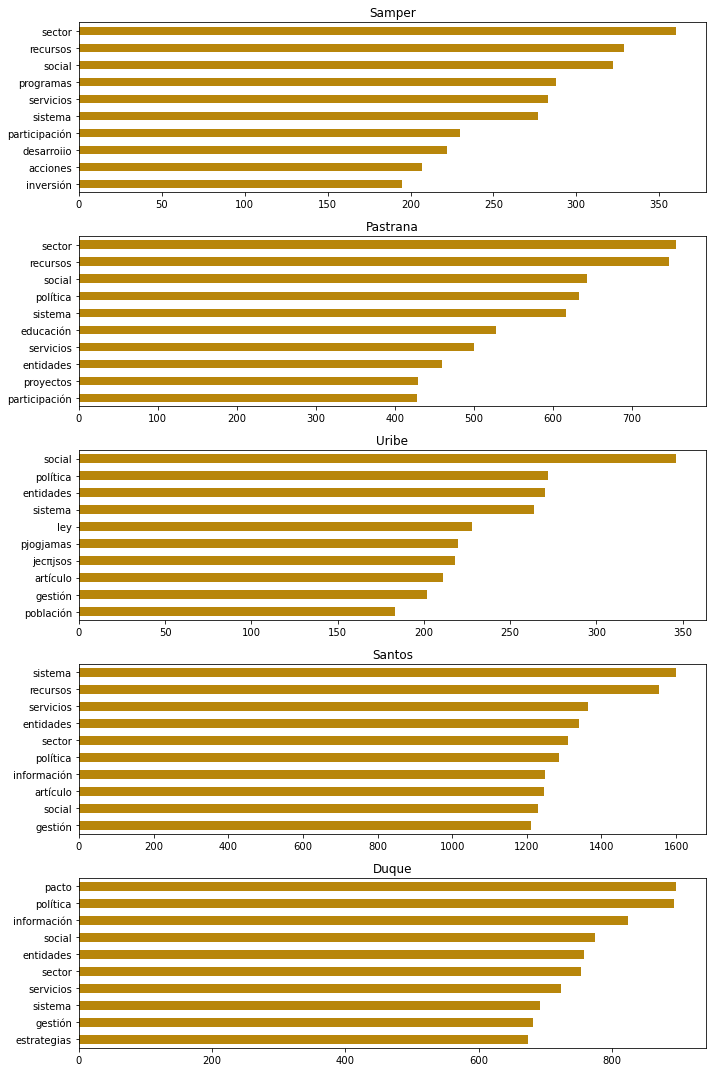

In [28]:
# Top 10 palabras por autor (sin stopwords)
# ==============================================================================
fig, axs = plt.subplots(nrows=5, ncols=1,figsize=(10, 15))
for i, Presidente in enumerate(pnd_tidy.Presidente.unique()):
    df_temp = pnd_tidy[pnd_tidy.Presidente == Presidente]
    counts  = df_temp['token'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='darkgoldenrod', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(Presidente)

fig.tight_layout()

In [29]:
pnd_pivot = pnd_tidy.groupby(["Presidente","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="Presidente", values= "count")
pnd_pivot.columns.name = None

In [30]:
# Test de correlación (coseno) por el uso y frecuencia de palabras
pnd_pivot.corr(method=similitud_coseno)

,Duque,Pastrana,Samper,Santos,Uribe
Duque,1.000000,0.844474,0.805533,0.914389,0.725553
Pastrana,0.844474,1.000000,0.922648,0.916953,0.813939
Samper,0.805533,0.922648,1.000000,0.863580,0.764285
Santos,0.914389,0.916953,0.863580,1.000000,0.797965
Uribe,0.725553,0.813939,0.764285,0.797965,1.000000


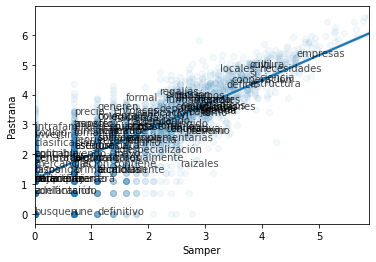

In [31]:
# Gráfico de correlación
# las dos personas con mayor similitud (Samper y Pastrana 92.26%)
f, ax = plt.subplots(figsize=(6, 4))
temp = pnd_pivot.dropna()
sns.regplot(
    x  = np.log(temp.Samper),
    y  = np.log(temp.Pastrana),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
);
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(
        text  = temp.index[i],
        xy    = (np.log(temp.Samper[i]), np.log(temp.Pastrana[i])),
        alpha = 0.7
    )

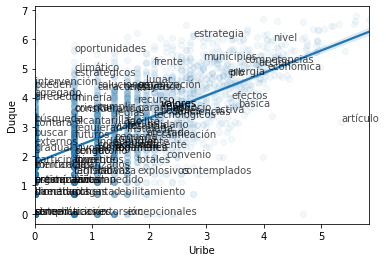

In [32]:
# Gráfico de correlación
# las dos personas con la mayor diferencia en su texto (Uribe y Duque 72.64%)
f, ax = plt.subplots(figsize=(6, 4))
temp = pnd_pivot.dropna()
sns.regplot(
    x  = np.log(temp.Uribe),
    y  = np.log(temp.Duque),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
);
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(
        text  = temp.index[i],
        xy    = (np.log(temp.Uribe[i]), np.log(temp.Duque[i])),
        alpha = 0.7
    )

In [33]:
# Número de palabras comunes entre los 5 presidentes

palabras_Samper = set(pnd_tidy[pnd_tidy.Presidente == 'Samper']['token'])
palabras_Pastrana = set(pnd_tidy[pnd_tidy.Presidente == 'Pastrana']['token'])
palabras_Uribe = set(pnd_tidy[pnd_tidy.Presidente == 'Uribe']['token'])
palabras_Santos = set(pnd_tidy[pnd_tidy.Presidente == 'Santos']['token'])
palabras_Duque = set(pnd_tidy[pnd_tidy.Presidente == 'Duque']['token'])

print(f"Palabras comunes entre Samper y Pastrana: {len(palabras_Samper.intersection(palabras_Pastrana))}")
print('-----------------------------------------------')
print(f"Palabras comunes entre Samper y Uribe: {len(palabras_Samper.intersection(palabras_Uribe))}")
print('-----------------------------------------------')
print(f"Palabras comunes entre Samper y Santos: {len(palabras_Samper.intersection(palabras_Santos))}")
print('-----------------------------------------------')
print(f"Palabras comunes entre Samper y Duque: {len(palabras_Samper.intersection(palabras_Duque))}")
print('-----------------------------------------------')
print(f"Palabras comunes entre Pastrana y Uribe: {len(palabras_Pastrana.intersection(palabras_Uribe))}")
print('-----------------------------------------------')
print(f"Palabras comunes entre Pastrana y Santos: {len(palabras_Pastrana.intersection(palabras_Santos))}")
print('-----------------------------------------------')
print(f"Palabras comunes entre Pastrana y Duque: {len(palabras_Pastrana.intersection(palabras_Duque))}")
print('-----------------------------------------------')
print(f"Palabras comunes entre Uribe y Santos: {len(palabras_Uribe.intersection(palabras_Santos))}")
print('-----------------------------------------------')
print(f"Palabras comunes entre Uribe y Duque: {len(palabras_Uribe.intersection(palabras_Duque))}")
print('-----------------------------------------------')
print(f"Palabras comunes entre Santos y Duque: {len(palabras_Santos.intersection(palabras_Duque))}")

Palabras comunes entre Samper y Pastrana: 6140
-----------------------------------------------
Palabras comunes entre Samper y Uribe: 3569
-----------------------------------------------
Palabras comunes entre Samper y Santos: 6498
-----------------------------------------------
Palabras comunes entre Samper y Duque: 5644
-----------------------------------------------
Palabras comunes entre Pastrana y Uribe: 4387
-----------------------------------------------
Palabras comunes entre Pastrana y Santos: 9240
-----------------------------------------------
Palabras comunes entre Pastrana y Duque: 7838
-----------------------------------------------
Palabras comunes entre Uribe y Santos: 4874
-----------------------------------------------
Palabras comunes entre Uribe y Duque: 4401
-----------------------------------------------
Palabras comunes entre Santos y Duque: 10179


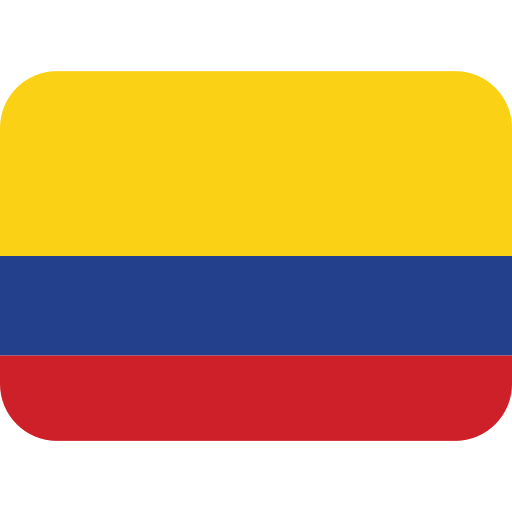

In [34]:
img = PIL.Image.open("D:/KL/NLP/Proyecto/BanderaColombia3.png")
mask = np.array(img)
display(img)

In [35]:
Samper = pnd[pnd.Presidente == "Samper"]
Samper["textCount"] = pnd["texto_tokenizado"].str.len()
Samper = Samper.drop(Samper[Samper['textCount']<1].index)
Samper = Samper.rename(columns={'pre-procesado':'pp'})
Samper.head()

,Presidente,Periodo,Parrafo,Texto,pp,stemmedtext,textCount,texto_tokenizado
0,Samper,1994 - 1998,11,EI SaIto SociaI,ei saito sociai,ei saito sociai,3,"[ei, saito, sociai]"
2,Samper,1994 - 1998,15,Ley de inversiones 1994 - 1998,ley inversiones,ley inversion,2,"[ley, inversiones]"
3,Samper,1994 - 1998,22,PRESIDENCIA DE LA REPÚBLICA DEPARTAMENTO NACIO...,presidencia república departamento nacional pl...,presidencia república departamento nacion plan...,5,"[presidencia, república, departamento, naciona..."
4,Samper,1994 - 1998,27,Presidente de la República. Ernesto Samper Pizano,presidente república ernesto samper pizano,president república ernesto samper pizano,5,"[presidente, república, ernesto, samper, pizano]"
5,Samper,1994 - 1998,29,DEPARTAMENTO NACIONAL DE PLANEACIÓN,departamento nacional planeación,departamento nacion planeación,3,"[departamento, nacional, planeación]"


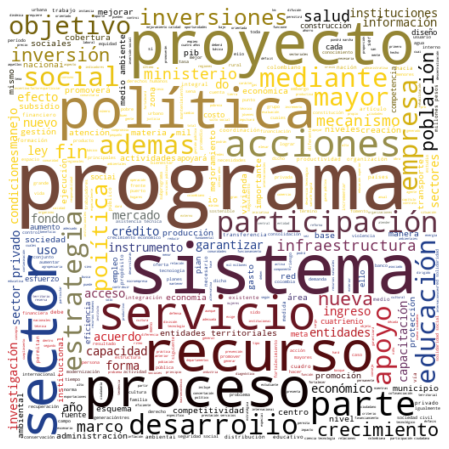

In [36]:
palabras = Samper.pp.str.cat(sep=' ')
image_colors = ImageColorGenerator(mask)
# Generate a word cloud image
wordcloud_samper = WordCloud(stopwords=stopwords_sp, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(palabras)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud_samper.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("D:/KL/NLP/Proyecto/pndSamper.png", format="png")
plt.show()

In [37]:
Pastrana = pnd[pnd.Presidente == "Pastrana"]
Pastrana["textCount"] = pnd["texto_tokenizado"].str.len()
Pastrana = Pastrana.drop(Pastrana[Pastrana['textCount']<1].index)
Pastrana = Pastrana.rename(columns={'pre-procesado':'pp'})
Pastrana.head()

,Presidente,Periodo,Parrafo,Texto,pp,stemmedtext,textCount,texto_tokenizado
2208,Pastrana,1998 - 2002,6,PLAN NACIONAL DE DESARROLLO,plan nacional desarrollo,plan nacion desarrollo,3,"[plan, nacional, desarrollo]"
2210,Pastrana,1998 - 2002,8,CAMBIO PARA CONSTRUIR LA PAZ,cambio construir paz,cambio construir paz,3,"[cambio, construir, paz]"
2211,Pastrana,1998 - 2002,17,TOMO 1,tomo,tomo,1,[tomo]
2212,Pastrana,1998 - 2002,24,REPÚBLICA DE COLOMBIA DEPARTAMENTO NACIONAL DE...,república colombia departamento nacional plane...,república colombia departamento nacion planeación,5,"[república, colombia, departamento, nacional, ..."
2213,Pastrana,1998 - 2002,30,CONTENIDO,contenido,contenido,1,[contenido]


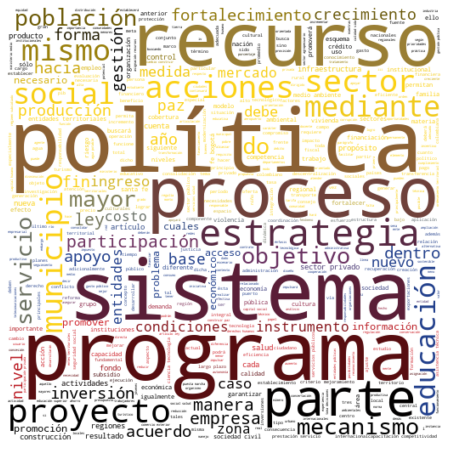

In [38]:
palabras = Pastrana.pp.str.cat(sep=' ')
image_colors = ImageColorGenerator(mask)
# Generate a word cloud image
wordcloud_samper = WordCloud(stopwords=stopwords_sp, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(palabras)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud_samper.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("D:/KL/NLP/Proyecto/pndPastrana.png", format="png")
plt.show()

In [39]:
Uribe = pnd[pnd.Presidente == "Uribe"]
Uribe["textCount"] = pnd["texto_tokenizado"].str.len()
Uribe = Uribe.drop(Uribe[Uribe['textCount']<1].index)
Uribe = Uribe.rename(columns={'pre-procesado':'pp'})
Uribe.head()

,Presidente,Periodo,Parrafo,Texto,pp,stemmedtext,textCount,texto_tokenizado
8323,Uribe,2002 - 2010,9,P an Naciona de Desarro o 2002-2006,p an naciona desarro,p an naciona desarro,3,"[an, naciona, desarro]"
8324,Uribe,2002 - 2010,22,Hacia un Estado Comunitario,hacia comunitario,hacia comunitario,2,"[hacia, comunitario]"
8325,Uribe,2002 - 2010,43,© DepaJtamento Nacional de Planeación ISBN 802...,depajtamento nacional planeación isbn,depajtamento nacion planeación isbn,4,"[depajtamento, nacional, planeación, isbn]"
8326,Uribe,2002 - 2010,45,CooJdinación EditoJial,coojdinación editojial,coojdinación editoji,2,"[coojdinación, editojial]"
8327,Uribe,2002 - 2010,46,Gr¥po de Com¥ scacso es y 9e/acso es Púb/scas,gr po com scacso acso púb scas,gr po com scacso acso púb sca,7,"[gr, po, com, scacso, acso, púb, scas]"


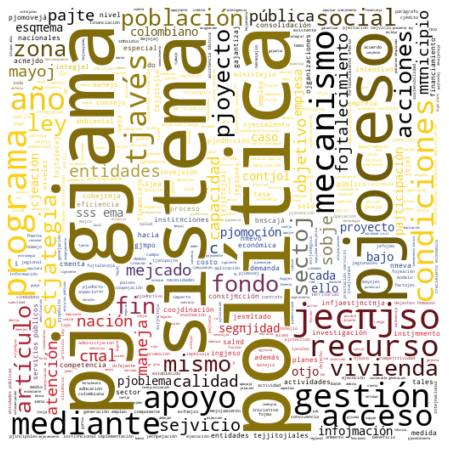

In [40]:
palabras = Uribe.pp.str.cat(sep=' ')
image_colors = ImageColorGenerator(mask)
# Generate a word cloud image
wordcloud_samper = WordCloud(stopwords=stopwords_sp, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(palabras)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud_samper.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("D:/KL/NLP/Proyecto/pndUribe.png", format="png")
plt.show()

In [41]:
Santos = pnd[pnd.Presidente == "Santos"]
Santos["textCount"] = pnd["texto_tokenizado"].str.len()
Santos = Santos.drop(Santos[Santos['textCount']<1].index)
Santos = Santos.rename(columns={'pre-procesado':'pp'})
Santos.head()

,Presidente,Periodo,Parrafo,Texto,pp,stemmedtext,textCount,texto_tokenizado
11713,Santos,2010 - 2014,3,Plan Nacional de,plan nacional,plan nacion,2,"[plan, nacional]"
11714,Santos,2010 - 2014,4,Desarrollo,desarrollo,desarrollo,1,[desarrollo]
11716,Santos,2010 - 2014,8,"Más empleo, menos pobreza y más seguridad",empleo menos pobreza seguridad,empleo meno pobreza seguridad,4,"[empleo, menos, pobreza, seguridad]"
11717,Santos,2010 - 2014,11,Subdirección General,subdirección general,subdirección gener,2,"[subdirección, general]"
11718,Santos,2010 - 2014,12,Juan Mauricio Ramírez Cortés,juan mauricio ramírez cortés,juan mauricio ramírez corté,4,"[juan, mauricio, ramírez, cortés]"


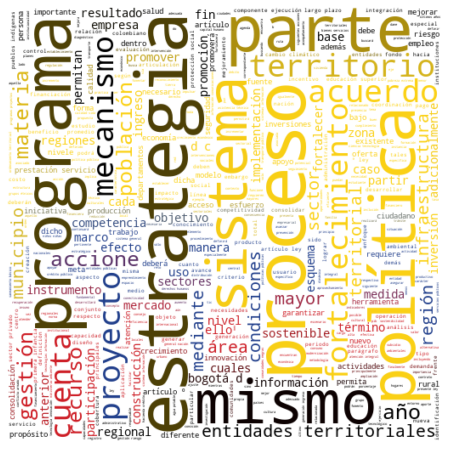

In [42]:
palabras = Santos.pp.str.cat(sep=' ')
image_colors = ImageColorGenerator(mask)
# Generate a word cloud image
wordcloud_samper = WordCloud(stopwords=stopwords_sp, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(palabras)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud_samper.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("D:/KL/NLP/Proyecto/pndSantos.png", format="png")
plt.show()

In [43]:
Duque = pnd[pnd.Presidente == "Duque"]
Duque["textCount"] = pnd["texto_tokenizado"].str.len()
Duque = Duque.drop(Duque[Duque['textCount']<1].index)
Duque = Duque.rename(columns={'pre-procesado':'pp'})
Duque.head()

,Presidente,Periodo,Parrafo,Texto,pp,stemmedtext,textCount,texto_tokenizado
25470,Duque,2018 - 2022,6,Presidente de la República Iván Duque Márquez,presidente república iván duque márquez,president república iván duqu márquez,5,"[presidente, república, iván, duque, márquez]"
25472,Duque,2018 - 2022,8,Vicepresidente de la República Marta Lucía Ram...,vicepresidente república marta lucía ramírez b...,vicepresident república marta lucía ramírez bl...,6,"[vicepresidente, república, marta, lucía, ramí..."
25473,Duque,2018 - 2022,9,Departamento Nacional de Planeación,departamento nacional planeación,departamento nacion planeación,3,"[departamento, nacional, planeación]"
25474,Duque,2018 - 2022,10,Directora General,directora general,directora gener,2,"[directora, general]"
25475,Duque,2018 - 2022,11,Gloria Alonso Másmela,gloria alonso másmela,gloria alonso másmela,3,"[gloria, alonso, másmela]"


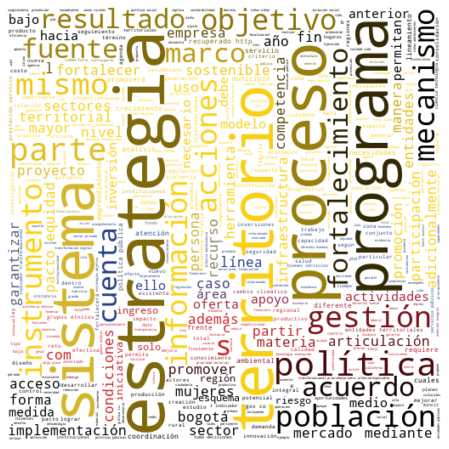

In [44]:
palabras = Duque.pp.str.cat(sep=' ')
image_colors = ImageColorGenerator(mask)
# Generate a word cloud image
wordcloud_samper = WordCloud(stopwords=stopwords_sp, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(palabras)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud_samper.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("D:/KL/NLP/Proyecto/pndDuque.png", format="png")
plt.show()